In [1]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_classification, make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.mixture import GaussianMixture
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn_som.som import SOM
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

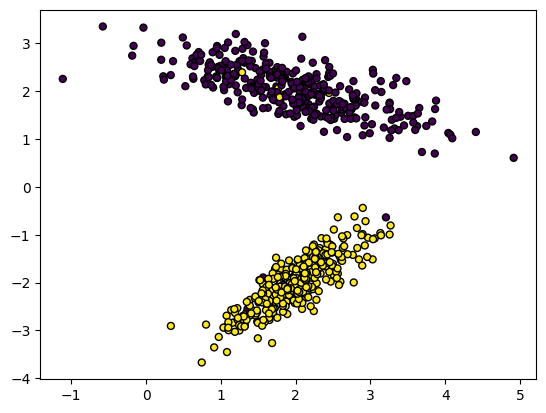

In [2]:
data1, data1_y = make_classification(n_samples=700, n_classes=2, 
                                   n_features=2, n_redundant=0, 
                                   class_sep=2, n_clusters_per_class=1, 
                                   flip_y=0.02, random_state=110)

plt.scatter(data1[:, 0], data1[:, 1], marker="o", c=data1_y, s=25, edgecolor="k")
plt.show()

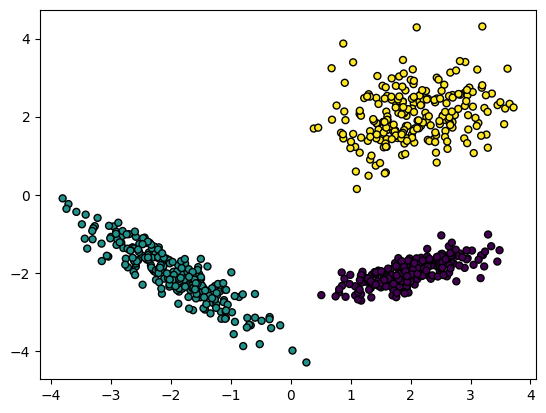

In [3]:
data2, data2_y = make_classification(n_samples=700, n_classes=3, 
                                   n_features=2, n_redundant=0, 
                                   class_sep=2, n_informative=2,
                                   n_clusters_per_class=1, flip_y=0, random_state=70)

plt.scatter(data2[:, 0], data2[:, 1], marker="o", c=data2_y, s=25, edgecolor="k")
plt.show()

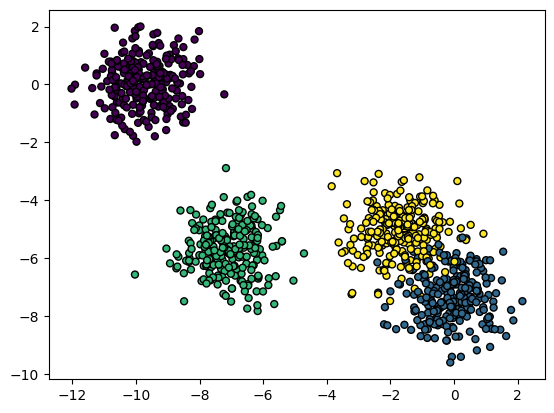

In [4]:
data3, data3_y = make_blobs(n_samples = 1000, n_features = 2,
                            centers = 4, cluster_std = 0.8,
                            shuffle = True, random_state = 9)

plt.scatter(data3[:, 0], data3[:, 1], marker="o", c=data3_y, s=25, edgecolor="k")
plt.show()

In [5]:
kmeans1 = KMeans(2, n_init='auto').fit(data1)
kmeans2 = KMeans(3, n_init='auto').fit(data2)
kmeans3 = KMeans(4, n_init='auto').fit(data3)

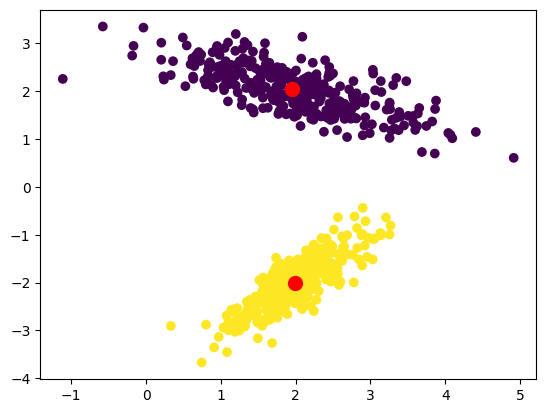

In [6]:
plt.scatter(data1[:,0], data1[:,1], c=kmeans1.labels_)
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s=100, c='red')

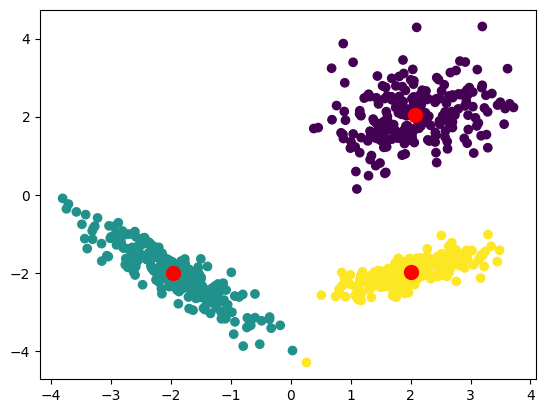

In [7]:
plt.scatter(data2[:,0], data2[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s=100, c='red')

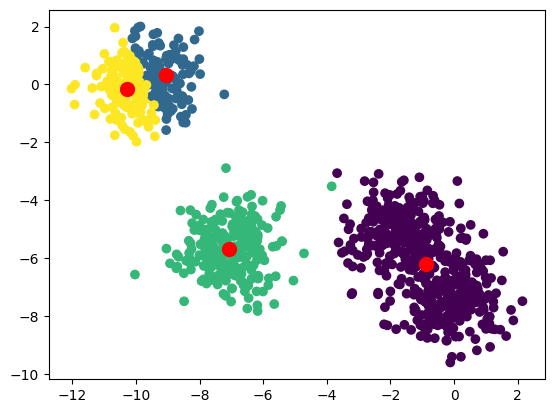

In [42]:
plt.scatter(data3[:,0], data3[:,1], c=kmeans3.labels_)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=100, c='red')

In [9]:
print('Внешние меры оценки качества')
print('Индекс Adjusted Rand')
print(f'Первый датасет: {adjusted_rand_score(kmeans1.labels_, data1_y)}')
print(f'Первый датасет: {adjusted_rand_score(kmeans2.labels_, data2_y)}')
print(f'Первый датасет: {adjusted_rand_score(kmeans3.labels_, data3_y)}')
print('Индекс Rand')
print(f'Первый датасет: {rand_score(kmeans1.labels_, data1_y)}')
print(f'Второй датасет: {rand_score(kmeans2.labels_, data2_y)}')
print(f'Третий датасет: {rand_score(kmeans3.labels_, data3_y)}')
print('')
print('Внутренние меры оценки качества')
print('Силуэт')
print(f'Первый датасет: {silhouette_score(data1, kmeans1.labels_)}')
print(f'Второй датасет: {silhouette_score(data2, kmeans2.labels_)}')
print(f'Третий датасет: {silhouette_score(data3, kmeans3.labels_)}')
print('Индекс Дэвиcа-Болдуина')
print(f'Первый датасет: {davies_bouldin_score(data1, kmeans1.labels_)}')
print(f'Второй датасет: {davies_bouldin_score(data2, kmeans2.labels_)}')
print(f'Третий датасет: {davies_bouldin_score(data3, kmeans3.labels_)}')

Внешние меры оценки качества
Индекс Adjusted Rand
Первый датасет: 0.949159921067073
Первый датасет: 0.9957081634660454
Первый датасет: 0.6276347005431173
Индекс Rand
Первый датасет: 0.9745800122624158
Второй датасет: 0.9980952380952381
Третий датасет: 0.8431931931931932

Внутренние меры оценки качества
Силуэт
Первый датасет: 0.7526591559815055
Второй датасет: 0.7261393807059898
Третий датасет: 0.5839656083768269
Индекс Дэвиcа-Болдуина
Первый датасет: 0.35288153643975145
Второй датасет: 0.3554486204374408
Третий датасет: 0.831058858004768


D:\ML\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


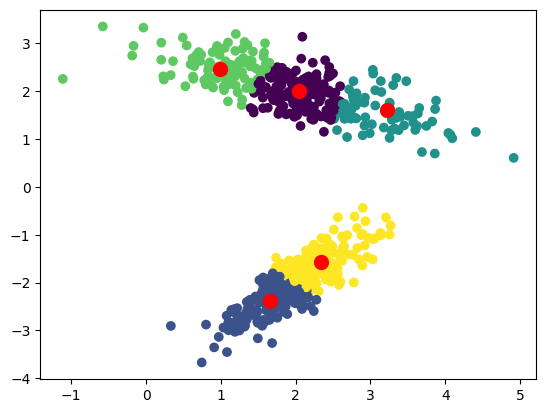

In [10]:
clustering1 = AffinityPropagation(preference=-42).fit(data1)

plt.scatter(data1[:,0], data1[:,1], c=clustering1.labels_)
plt.scatter(clustering1.cluster_centers_[:,0], clustering1.cluster_centers_[:,1], s=100, c='red')

D:\ML\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


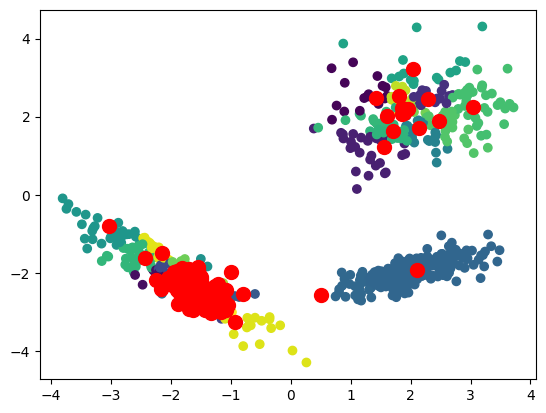

In [11]:
clustering2 = AffinityPropagation(preference=-42).fit(data2)

plt.scatter(data2[:,0], data2[:,1], c=clustering2.labels_)
plt.scatter(clustering2.cluster_centers_[:,0], clustering2.cluster_centers_[:,1], s=100, c='red')

D:\ML\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


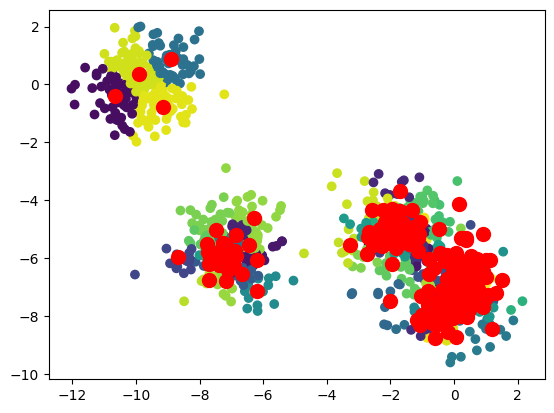

In [12]:
clustering3 = AffinityPropagation(preference=-42).fit(data3)

plt.scatter(data3[:,0], data3[:,1], c=clustering3.labels_)
plt.scatter(clustering3.cluster_centers_[:,0], clustering3.cluster_centers_[:,1], s=100, c='red')

In [13]:
print('Внешние меры оценки качества')
print('Индекс Adjusted Rand')
print(f'Первый датасет: {adjusted_rand_score(clustering1.labels_, data1_y)}')
print(f'Первый датасет: {adjusted_rand_score(clustering2.labels_, data2_y)}')
print(f'Первый датасет: {adjusted_rand_score(clustering3.labels_, data3_y)}')
print('Индекс Rand')
print(f'Первый датасет: {rand_score(clustering1.labels_, data1_y)}')
print(f'Второй датасет: {rand_score(clustering2.labels_, data2_y)}')
print(f'Третий датасет: {rand_score(clustering3.labels_, data3_y)}')
print('')
print('Внутренние меры оценки качества')
print('Силуэт')
print(f'Первый датасет: {silhouette_score(data1, clustering1.labels_)}')
print(f'Второй датасет: {silhouette_score(data2, clustering2.labels_)}')
print(f'Третий датасет: {silhouette_score(data3, clustering3.labels_)}')
print('Индекс Дэвиcа-Болдуина')
print(f'Первый датасет: {davies_bouldin_score(data1, clustering1.labels_)}')
print(f'Второй датасет: {davies_bouldin_score(data2, clustering2.labels_)}')
print(f'Третий датасет: {davies_bouldin_score(data3, clustering3.labels_)}')

Внешние меры оценки качества
Индекс Adjusted Rand
Первый датасет: 0.40857881568008686
Первый датасет: 0.3769462923050075
Первый датасет: 0.12105908666600813
Индекс Rand
Первый датасет: 0.7045289188636829
Второй датасет: 0.7712609850807276
Третий датасет: 0.7715255255255256

Внутренние меры оценки качества
Силуэт
Первый датасет: 0.4452635614793869
Второй датасет: 0.21029080439348963
Третий датасет: 0.14999910495632174
Индекс Дэвиcа-Болдуина
Первый датасет: 0.7592800990433449
Второй датасет: 0.4982651639146103
Третий датасет: 0.5718533181438666


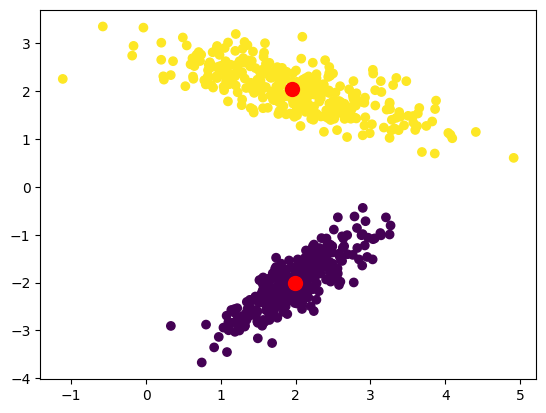

In [14]:
gm1 = GaussianMixture(n_components=2).fit(data1)

gm1.predict(data1)

plt.scatter(data1[:,0], data1[:,1], c=gm1.predict(data1))
plt.scatter(gm1.means_[:,0], gm1.means_[:,1], s=100, c='red')

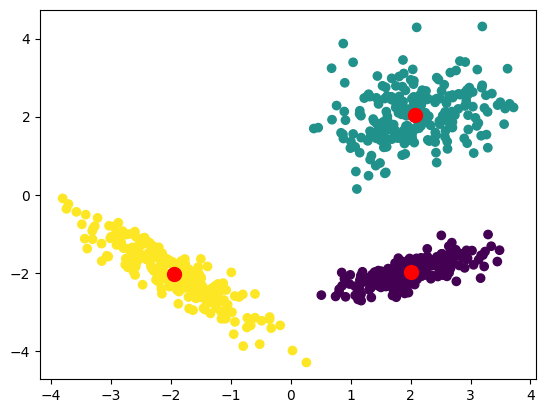

In [15]:
gm2 = GaussianMixture(n_components=3).fit(data2)

gm2.predict(data2)

plt.scatter(data2[:,0], data2[:,1], c=gm2.predict(data2))
plt.scatter(gm2.means_[:,0], gm2.means_[:,1], s=100, c='red')

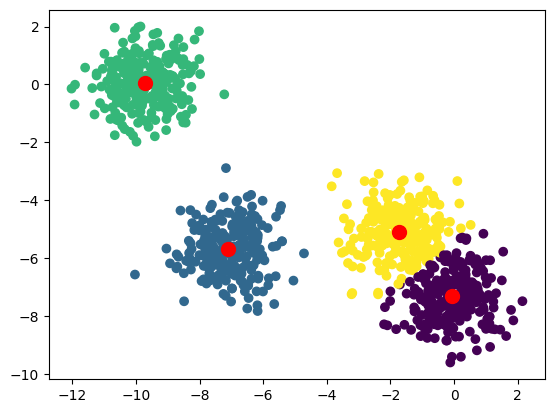

In [16]:
gm3 = GaussianMixture(n_components=4).fit(data3)

gm3.predict(data3)

plt.scatter(data3[:,0], data3[:,1], c=gm3.predict(data3))
plt.scatter(gm3.means_[:,0], gm3.means_[:,1], s=100, c='red')

In [17]:
print('Внешние меры оценки качества')
print('Индекс Adjusted Rand')
print(f'Первый датасет: {adjusted_rand_score(gm1.predict(data1), data1_y)}')
print(f'Первый датасет: {adjusted_rand_score(gm2.predict(data2), data2_y)}')
print(f'Первый датасет: {adjusted_rand_score(gm3.predict(data3), data3_y)}')
print('Индекс Rand')
print(f'Первый датасет: {rand_score(gm1.predict(data1), data1_y)}')
print(f'Второй датасет: {rand_score(gm2.predict(data2), data2_y)}')
print(f'Третий датасет: {rand_score(gm3.predict(data3), data3_y)}')
print('')
print('Внутренние меры оценки качества')
print('Силуэт')
print(f'Первый датасет: {silhouette_score(data1, gm1.predict(data1))}')
print(f'Второй датасет: {silhouette_score(data2, gm2.predict(data2))}')
print(f'Третий датасет: {silhouette_score(data3, gm3.predict(data3))}')
print('Индекс Дэвиcа-Болдуина')
print(f'Первый датасет: {davies_bouldin_score(data1, gm1.predict(data1))}')
print(f'Второй датасет: {davies_bouldin_score(data2, gm2.predict(data2))}')
print(f'Третий датасет: {davies_bouldin_score(data3, gm3.predict(data3))}')

Внешние меры оценки качества
Индекс Adjusted Rand
Первый датасет: 0.949159921067073
Первый датасет: 1.0
Первый датасет: 0.931683026649551
Индекс Rand
Первый датасет: 0.9745800122624158
Второй датасет: 1.0
Третий датасет: 0.9744324324324324

Внутренние меры оценки качества
Силуэт
Первый датасет: 0.7526591559815055
Второй датасет: 0.7258400060833673
Третий датасет: 0.6308501646012632
Индекс Дэвиcа-Болдуина
Первый датасет: 0.35288153643975145
Второй датасет: 0.3550810037005334
Третий датасет: 0.5299899406248735


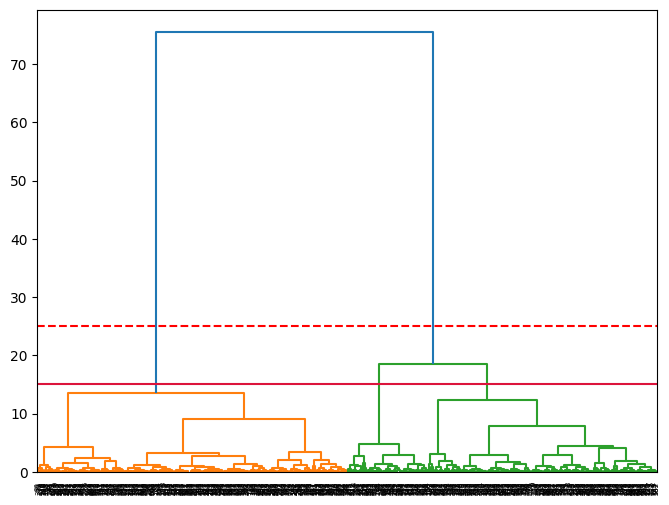

In [18]:
clusters1 = hierarchy.linkage(data1, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters1)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(25, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(15, color='crimson'); 

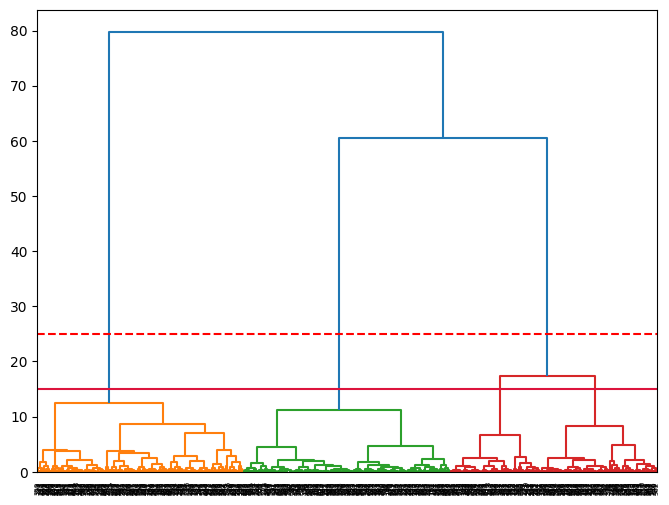

In [19]:
clusters2 = hierarchy.linkage(data2, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters2)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(25, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(15, color='crimson'); 

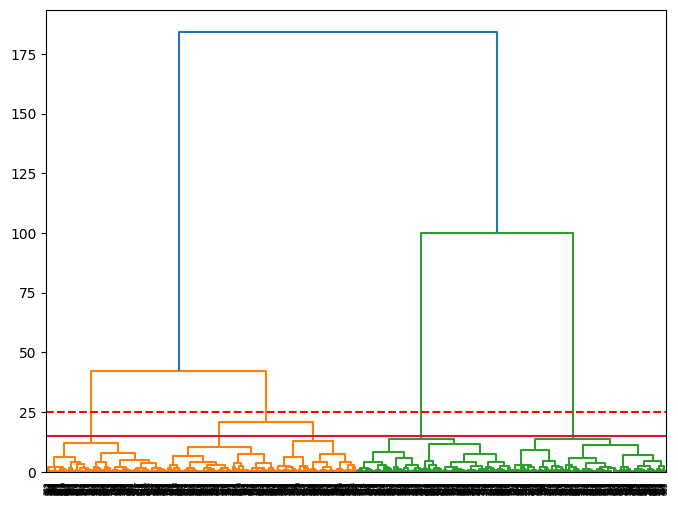

In [20]:
clusters3 = hierarchy.linkage(data3, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters3)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(25, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(15, color='crimson'); 

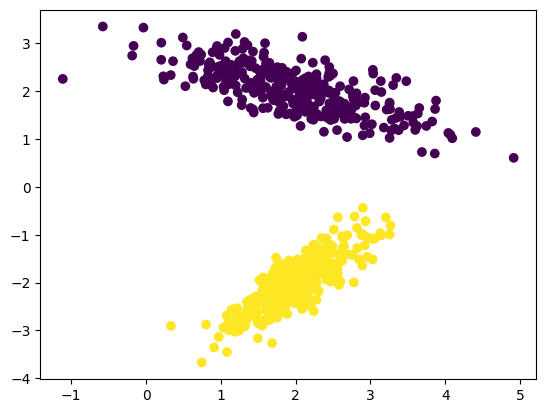

In [21]:
cluster1 = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(data1)
plt.scatter(data1[:,0], data1[:,1], c=cluster1.labels_)

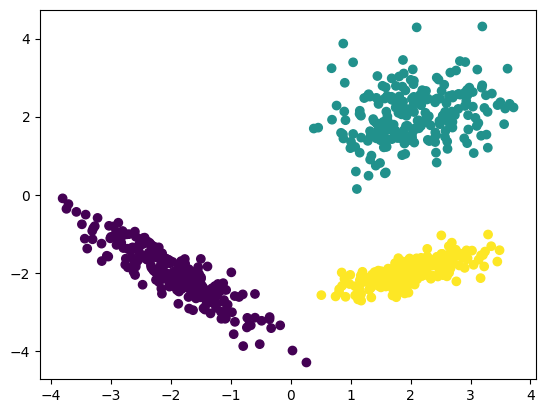

In [22]:
cluster2 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data2)
plt.scatter(data2[:,0], data2[:,1], c=cluster2.labels_)

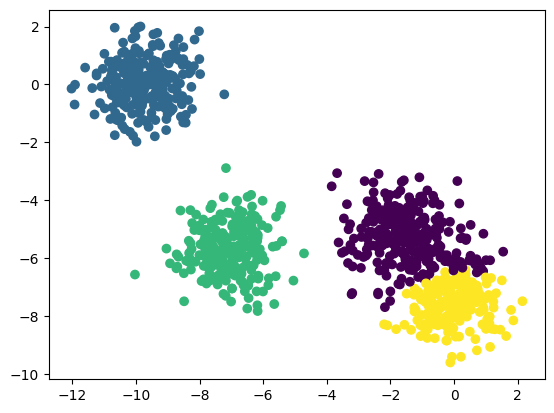

In [23]:
cluster3 = AgglomerativeClustering(n_clusters=4, linkage="ward").fit(data3)
plt.scatter(data3[:,0], data3[:,1], c=cluster3.labels_)

In [24]:
print('Внешние меры оценки качества')
print('Индекс Adjusted Rand')
print(f'Первый датасет: {adjusted_rand_score(cluster1.labels_, data1_y)}')
print(f'Первый датасет: {adjusted_rand_score(cluster2.labels_, data2_y)}')
print(f'Первый датасет: {adjusted_rand_score(cluster3.labels_, data3_y)}')
print('Индекс Rand')
print(f'Первый датасет: {rand_score(cluster1.labels_, data1_y)}')
print(f'Второй датасет: {rand_score(cluster2.labels_, data2_y)}')
print(f'Третий датасет: {rand_score(cluster3.labels_, data3_y)}')
print('')
print('Внутренние меры оценки качества')
print('Силуэт')
print(f'Первый датасет: {silhouette_score(data1, cluster1.labels_)}')
print(f'Второй датасет: {silhouette_score(data2, cluster2.labels_)}')
print(f'Третий датасет: {silhouette_score(data3, cluster3.labels_)}')
print('Индекс Дэвиcа-Болдуина')
print(f'Первый датасет: {davies_bouldin_score(data1, cluster1.labels_)}')
print(f'Второй датасет: {davies_bouldin_score(data2, cluster2.labels_)}')
print(f'Третий датасет: {davies_bouldin_score(data3, cluster3.labels_)}')

Внешние меры оценки качества
Индекс Adjusted Rand
Первый датасет: 0.949159921067073
Первый датасет: 1.0
Первый датасет: 0.8539112830137117
Индекс Rand
Первый датасет: 0.9745800122624158
Второй датасет: 1.0
Третий датасет: 0.9448828828828829

Внутренние меры оценки качества
Силуэт
Первый датасет: 0.7526591559815055
Второй датасет: 0.7258400060833673
Третий датасет: 0.6094623061514518
Индекс Дэвиcа-Болдуина
Первый датасет: 0.35288153643975145
Второй датасет: 0.3550810037005334
Третий датасет: 0.5519497190008691


In [25]:
som1 = SOM(m=2, n=1, dim=2)
som1.fit(data1)
predictions1 = som1.predict(data1)

In [26]:
som2 = SOM(m=3, n=1, dim=2)
som2.fit(data2)
predictions2 = som2.predict(data2)

In [27]:
som3 = SOM(m=4, n=2, dim=2)
som3.fit(data3)
predictions3 = som3.predict(data3)

In [28]:
print('Внешние меры оценки качества')
print('Индекс Adjusted Rand')
print(f'Первый датасет: {adjusted_rand_score(predictions1, data1_y)}')
print(f'Первый датасет: {adjusted_rand_score(predictions2 , data2_y)}')
print(f'Первый датасет: {adjusted_rand_score(predictions3, data3_y)}')
print('Индекс Rand')
print(f'Первый датасет: {rand_score(predictions1, data1_y)}')
print(f'Второй датасет: {rand_score(predictions2, data2_y)}')
print(f'Третий датасет: {rand_score(predictions3, data3_y)}')
print('')
print('Внутренние меры оценки качества')
print('Силуэт')
print(f'Первый датасет: {silhouette_score(data1, predictions1)}')
print(f'Второй датасет: {silhouette_score(data2, predictions2 )}')
print(f'Третий датасет: {silhouette_score(data3, predictions3)}')
print('Индекс Дэвиcа-Болдуина')
print(f'Первый датасет: {davies_bouldin_score(data1, predictions1)}')
print(f'Второй датасет: {davies_bouldin_score(data2, predictions2)}')
print(f'Третий датасет: {davies_bouldin_score(data3, predictions3)}')

Внешние меры оценки качества
Индекс Adjusted Rand
Первый датасет: 0.949159921067073
Первый датасет: 0.987161330196711
Первый датасет: 0.7950849269430686
Индекс Rand
Первый датасет: 0.9745800122624158
Второй датасет: 0.9943020641733088
Третий датасет: 0.9286526526526526

Внутренние меры оценки качества
Силуэт
Первый датасет: 0.7526591559815055
Второй датасет: 0.7222362860363302
Третий датасет: 0.39985757774524866
Индекс Дэвиcа-Болдуина
Первый датасет: 0.35288153643975145
Второй датасет: 0.3581512125305301
Третий датасет: 0.792563564576746


[-1  0  1]


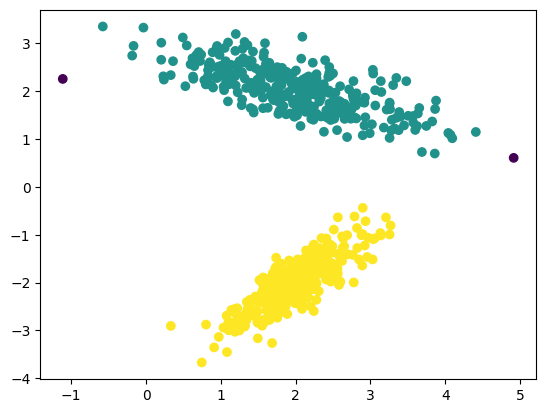

In [29]:
DbScan1 = DBSCAN(eps=0.550, min_samples=4).fit(data1)
print(np.unique(DbScan1.labels_))
plt.scatter(data1[:,0], data1[:,1], c=DbScan1.labels_)

[-1  0  1  2]


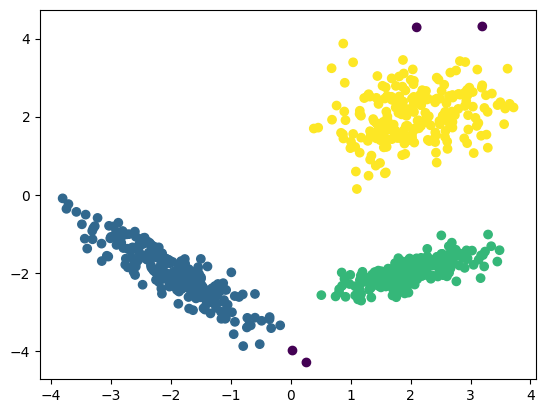

In [30]:
DbScan2 = DBSCAN(eps=0.550, min_samples=4).fit(data2)
print(np.unique(DbScan2.labels_))
plt.scatter(data2[:,0], data2[:,1], c=DbScan2.labels_)

[-1  0  1  2]


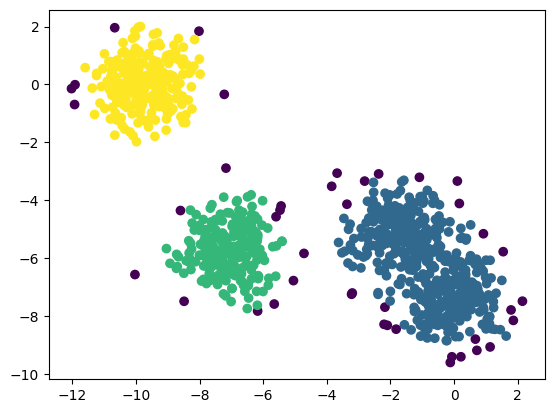

In [31]:
DbScan3 = DBSCAN(eps=0.450, min_samples=4).fit(data3)
print(np.unique(DbScan3.labels_))
plt.scatter(data3[:,0], data3[:,1], c=DbScan3.labels_)

In [32]:
print('Внешние меры оценки качества')
print('Индекс Adjusted Rand')
print(f'Первый датасет: {adjusted_rand_score(DbScan1.labels_, data1_y)}')
print(f'Первый датасет: {adjusted_rand_score(DbScan2.labels_ , data2_y)}')
print(f'Первый датасет: {adjusted_rand_score(DbScan3.labels_, data3_y)}')
print('Индекс Rand')
print(f'Первый датасет: {rand_score(DbScan1.labels_, data1_y)}')
print(f'Второй датасет: {rand_score(DbScan2.labels_, data2_y)}')
print(f'Третий датасет: {rand_score(DbScan3.labels_, data3_y)}')
print('')
print('Внутренние меры оценки качества')
print('Силуэт')
print(f'Первый датасет: {silhouette_score(data1, DbScan1.labels_)}')
print(f'Второй датасет: {silhouette_score(data2, DbScan2.labels_)}')
print(f'Третий датасет: {silhouette_score(data3, DbScan3.labels_)}')
print('Индекс Дэвиcа-Болдуина')
print(f'Первый датасет: {davies_bouldin_score(data1, DbScan1.labels_)}')
print(f'Второй датасет: {davies_bouldin_score(data2, DbScan2.labels_)}')
print(f'Третий датасет: {davies_bouldin_score(data3, DbScan3.labels_)}')

Внешние меры оценки качества
Индекс Adjusted Rand
Первый датасет: 0.9436331916174144
Первый датасет: 0.9914287670107176
Первый датасет: 0.6813827416780441
Индекс Rand
Первый датасет: 0.9718168812589414
Второй датасет: 0.9962068260780708
Третий датасет: 0.8657157157157157

Внутренние меры оценки качества
Силуэт
Первый датасет: 0.7118345731920421
Второй датасет: 0.7213805895446137
Третий датасет: 0.6289125354438063
Индекс Дэвиcа-Болдуина
Первый датасет: 4.6378963450802395
Второй датасет: 2.190799442388107
Третий датасет: 1.6269353751987183


Внешние меры оценки качества

Индекс Adjusted Rand: 0.949159921067073
Индекс Rand: 0.9745800122624158

Внутренние меры оценки качества
Силуэт: 0.7526591559815055
Индекс Дэвиcа-Болдуина: 0.35288153643975145


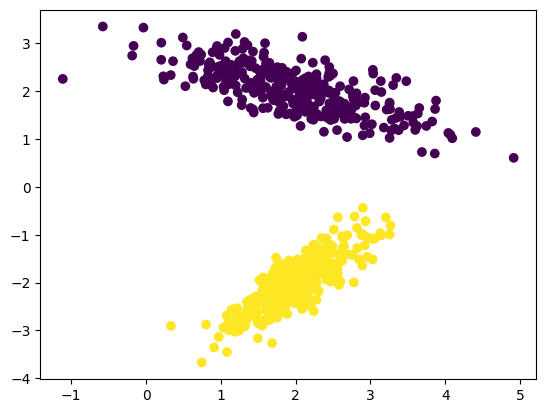

In [33]:
import sys
sys.path.append('D:\ML\mylib')
from KMeans import KMeans

k1 = KMeans(k=2)
y_pred1 = k1.fit(data1)
print('Внешние меры оценки качества')
print('')
print(f'Индекс Adjusted Rand: {adjusted_rand_score(y_pred1, data1_y)}')
print(f'Индекс Rand: {rand_score(y_pred1, data1_y)}')
print('')
print('Внутренние меры оценки качества')
print(f'Силуэт: {silhouette_score(data1, y_pred1)}')
print(f'Индекс Дэвиcа-Болдуина: {davies_bouldin_score(data1, y_pred1)}')

plt.scatter(data1[:, 0], data1[:, 1], c=y_pred1)
plt.show()

Внешние меры оценки качества

Индекс Adjusted Rand: 0.9914348526118384
Индекс Rand: 0.9961986511342734

Внутренние меры оценки качества
Силуэт: 0.7260646839245045
Индекс Дэвиcа-Болдуина: 0.35612529261733744


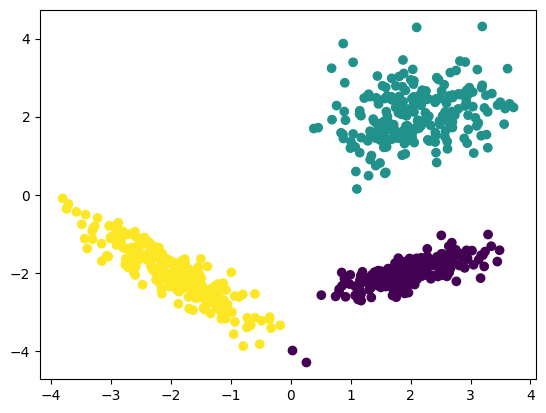

In [39]:
import sys
sys.path.append('D:\ML\mylib')
from KMeans import KMeans

k2 = KMeans(k=3)
y_pred2 = k2.fit(data2)
print('Внешние меры оценки качества')
print('')
print(f'Индекс Adjusted Rand: {adjusted_rand_score(y_pred2, data2_y)}')
print(f'Индекс Rand: {rand_score(y_pred2, data2_y)}')
print('')
print('Внутренние меры оценки качества')
print(f'Силуэт: {silhouette_score(data2, y_pred2)}')
print(f'Индекс Дэвиcа-Болдуина: {davies_bouldin_score(data2, y_pred2)}')
plt.scatter(data2[:, 0], data2[:, 1], c=y_pred2)
plt.show()

Внешние меры оценки качества

Индекс Adjusted Rand: 0.934074731535411
Индекс Rand: 0.9753273273273273

Внутренние меры оценки качества
Силуэт: 0.6311064056879767
Индекс Дэвиcа-Болдуина: 0.5295648074095967


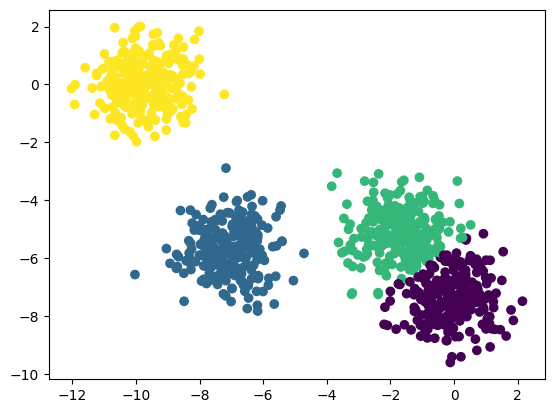

In [40]:
import sys
sys.path.append('D:\ML\mylib')
from KMeans import KMeans

k3 = KMeans(k=4)
y_pred3 = k3.fit(data3)
print('Внешние меры оценки качества')
print('')
print(f'Индекс Adjusted Rand: {adjusted_rand_score(y_pred3, data3_y)}')
print(f'Индекс Rand: {rand_score(y_pred3, data3_y)}')
print('')
print('Внутренние меры оценки качества')
print(f'Силуэт: {silhouette_score(data3, y_pred3)}')
print(f'Индекс Дэвиcа-Болдуина: {davies_bouldin_score(data3, y_pred3)}')
plt.scatter(data3[:, 0], data3[:, 1], c=y_pred3)
plt.show()

Внешние меры оценки качества

Индекс Adjusted Rand: 0.9325467762472344
Индекс Rand: 0.9662742693643981

Внутренние меры оценки качества
Силуэт: 0.7215228227157514
Индекс Дэвиcа-Болдуина: 2.0608424113497756


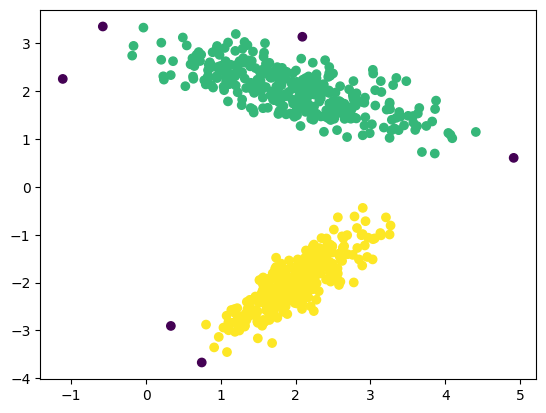

In [36]:
import sys
sys.path.append('D:\ML\mylib')
from DBSCAN import DBSCAN

dbscan1 = DBSCAN(eps=0.550, min_samples=4)
db_pred1 = dbscan1.fit(data1)

print('Внешние меры оценки качества')
print('')
print(f'Индекс Adjusted Rand: {adjusted_rand_score(db_pred1, data1_y)}')
print(f'Индекс Rand: {rand_score(db_pred1, data1_y)}')
print('')
print('Внутренние меры оценки качества')
print(f'Силуэт: {silhouette_score(data1, db_pred1)}')
print(f'Индекс Дэвиcа-Болдуина: {davies_bouldin_score(data1, db_pred1)}')

plt.scatter(data1[:, 0], data1[:, 1], c=db_pred1)
plt.show()

Внешние меры оценки качества

Индекс Adjusted Rand: 0.9829952929651338
Индекс Rand: 0.9924954015941141

Внутренние меры оценки качества
Силуэт: 0.6992671197747284
Индекс Дэвиcа-Болдуина: 2.839599057817848


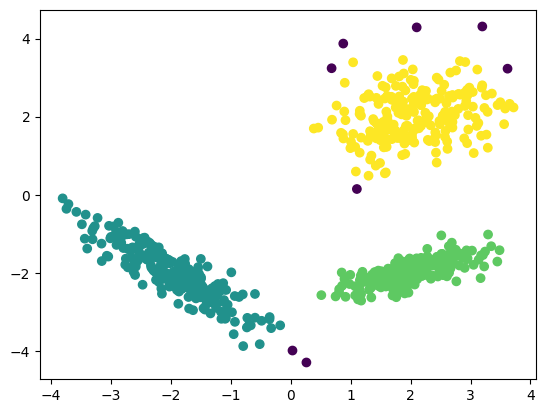

In [37]:
import sys
sys.path.append('D:\ML\mylib')
from DBSCAN import DBSCAN

dbscan2 = DBSCAN(eps=0.550, min_samples=4)
db_pred2 = dbscan2.fit(data2)

print('Внешние меры оценки качества')
print('')
print(f'Индекс Adjusted Rand: {adjusted_rand_score(db_pred2, data2_y)}')
print(f'Индекс Rand: {rand_score(db_pred2, data2_y)}')
print('')
print('Внутренние меры оценки качества')
print(f'Силуэт: {silhouette_score(data2, db_pred2)}')
print(f'Индекс Дэвиcа-Болдуина: {davies_bouldin_score(data2, db_pred2)}')

plt.scatter(data2[:, 0], data2[:, 1], c=db_pred2)
plt.show()

Внешние меры оценки качества

Индекс Adjusted Rand: 0.6037121316644041
Индекс Rand: 0.8395615615615616

Внутренние меры оценки качества
Силуэт: 0.5702646573616389
Индекс Дэвиcа-Болдуина: 1.670283946253559


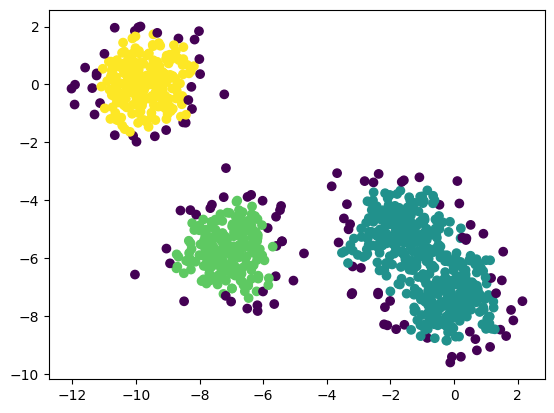

In [38]:
import sys
sys.path.append('D:\ML\mylib')
from DBSCAN import DBSCAN

dbscan3 = DBSCAN(eps=0.450, min_samples=6)
db_pred3 = dbscan3.fit(data3)

print('Внешние меры оценки качества')
print('')
print(f'Индекс Adjusted Rand: {adjusted_rand_score(db_pred3, data3_y)}')
print(f'Индекс Rand: {rand_score(db_pred3, data3_y)}')
print('')
print('Внутренние меры оценки качества')
print(f'Силуэт: {silhouette_score(data3, db_pred3)}')
print(f'Индекс Дэвиcа-Болдуина: {davies_bouldin_score(data3, db_pred3)}')

plt.scatter(data3[:, 0], data3[:, 1], c=db_pred3)
plt.show()